# DNA Base Sequence Content Analysis

This notebook demonstrates how to analyze and visualize the distribution of nucleotide bases in DNA sequence data using Polars and matplotlib.

## 0. Setup Environment

Before we begin our analysis, we should clean up any temporary files created by DataFusion/Apache Arrow from previous runs. These temporary catalogs can accumulate over time as they are created each time we run queries.

In [3]:
import os
import shutil

def cleanTMP():
    tmp_path = os.path.join(os.getcwd(), 'tmp')
    if os.path.exists(tmp_path):
        print(f"Usuwanie folderu tymczasowego: {tmp_path}")
        shutil.rmtree(tmp_path, ignore_errors=True)
        print("Folder tymczasowy usunięty.")
    else:
        print("Folder tymczasowy nie istnieje - brak potrzeby czyszczenia.")

cleanTMP()

Usuwanie folderu tymczasowego: /home/sh4dqw/dev/studies/Polars-UDF/notebooks/tmp
Folder tymczasowy usunięty.


## 1. Create Sample DNA Sequence Data

Let's import the necessary libraries for our analysis.

In [4]:
import polars as pl
import matplotlib.pyplot as plt
import polars_bio as pb
from polars_bio.quality_control_op import base_sequence_content
from polars_bio.quality_control_viz import plot_base_content

# Set matplotlib style for better visualizations
plt.style.use('ggplot')
%matplotlib inline

Now we'll create a simple example dataset with DNA sequences.

In [ ]:
short_sequences = pl.DataFrame({
    "sequence": ["ATGC", "AAGC", "ATTC", "GTCC"]
})

## 2. Analyze Base Sequence Content

Now we'll use the `base_sequence_content` function to analyze the distribution of bases at each position.

In [ ]:
result = base_sequence_content(short_sequences)
print(result)

## 3. Visualize Base Distribution

Let's visualize the distribution of bases at each position using our custom plotting function.

In [ ]:
plot_base_content(result, figsize=(10, 6))

## 4. Creating More Realistic Data

Generate a more realistic dataset with longer sequences to better visualize base content distribution.

In [5]:
import random

def generate_dna(length, n_freq=0.05):
    bases = ['A', 'C', 'G', 'T']
    sequence = []
    for _ in range(length):
        if random.random() < n_freq:
            sequence.append('N')
        else:
            sequence.append(random.choice(bases))
    return ''.join(sequence)

random.seed(42)
num_sequences = 100
seq_length = 100

sequences = [generate_dna(seq_length) for _ in range(num_sequences)]
df_sequences = pl.DataFrame({"sequence": sequences})

df_sequences.head()

sequence
str
"""ACAAANATGACGCGTGAATGGANGCTGGGA…"
"""AAACTTCTTTGAAATCAACCATGCGTGANA…"
"""ACGTTCGGCCCNTACTCAACTCATGTTTTC…"
"""CGGGCTCTACCGGGTGCCTGCGACACTATG…"
"""CCCGTGGTTGTGCCTNTCAGTTNCGTGTTA…"


Analyze base content on our larger dataset

In [5]:
result_large = base_sequence_content(df_sequences)
result_large.head()

<class 'polars.dataframe.frame.DataFrame'>


a_count,c_count,g_count,t_count,n_count
u64,u64,u64,u64,u64
31,25,21,18,5
28,24,25,22,1
22,18,27,25,8
25,21,20,30,4
26,23,21,22,8


Plot the base content distribution for our larger dataset

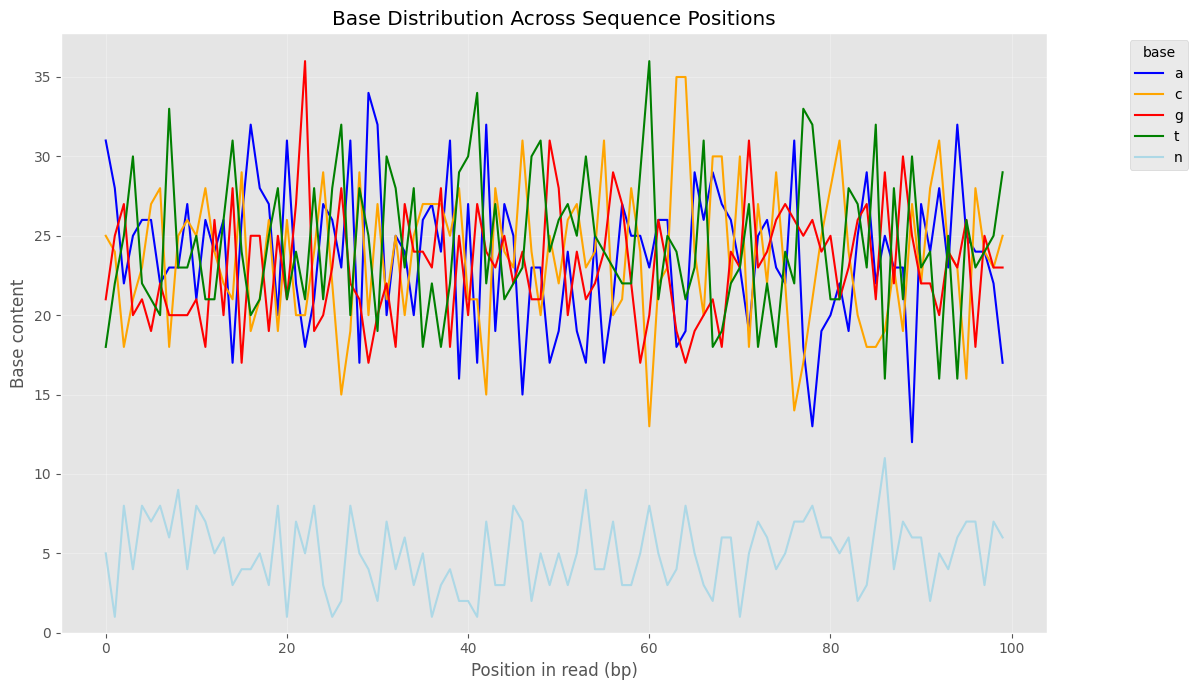

In [6]:
plot_base_content(
  result_large,
  figsize=(12, 7),
  title='Base Distribution Across Sequence Positions'
)

# 5. Processing Real FASTQ Data

5.1 Tesing with FASTQ file directly using file path

In [3]:
fastq_path = "../tests/data/quality_control/example.fastq"

# pb.ctx.set_option("datafusion.execution.target_partitions", "8")

fastq_results = pb.base_sequence_content(fastq_path)

print(f"Processed FASTQ file directly from path: {fastq_path}")
print("Base content analysis results (first 10 positions):")
print(fastq_results.head(10))

max_a = fastq_results["a_count"].max() if "a_count" in fastq_results.columns else 0
max_t = fastq_results["t_count"].max() if "t_count" in fastq_results.columns else 0
max_g = fastq_results["g_count"].max() if "g_count" in fastq_results.columns else 0
max_c = fastq_results["c_count"].max() if "c_count" in fastq_results.columns else 0
max_n = fastq_results["n_count"].max() if "n_count" in fastq_results.columns else 0

print(f"\nMaximum counts - A: {max_a}, T: {max_t}, G: {max_g}, C: {max_c}, N: {max_n}")

pb.plot_base_content(
    fastq_results, 
    figsize=(14, 8), 
    title='Base Distribution in FASTQ Sequences'
)

INFO:polars_bio:Table: err194147 registered for path: ./ERR194147.fastq
8240796rows [00:39, 206293.52rows/s]


Processed FASTQ file directly from path: ./ERR194147.fastq
Base content analysis results (first 10 positions):
shape: (10, 5)
┌─────────┬─────────┬─────────┬─────────┬─────────┐
│ a_count ┆ c_count ┆ g_count ┆ t_count ┆ n_count │
│ ---     ┆ ---     ┆ ---     ┆ ---     ┆ ---     │
│ u64     ┆ u64     ┆ u64     ┆ u64     ┆ u64     │
╞═════════╪═════════╪═════════╪═════════╪═════════╡
│ 2582639 ┆ 1553425 ┆ 1476263 ┆ 2627185 ┆ 1284    │
│ 2729566 ┆ 1362012 ┆ 1613074 ┆ 2535991 ┆ 153     │
│ 2657367 ┆ 1446518 ┆ 1539461 ┆ 2597313 ┆ 137     │
│ 2486411 ┆ 1522241 ┆ 1678814 ┆ 2550447 ┆ 2883    │
│ 2475534 ┆ 1537188 ┆ 1737023 ┆ 2490788 ┆ 263     │
│ 2536819 ┆ 1597502 ┆ 1717399 ┆ 2388581 ┆ 495     │
│ 2544825 ┆ 1552016 ┆ 1689875 ┆ 2453759 ┆ 321     │
│ 2530302 ┆ 1576212 ┆ 1617851 ┆ 2516089 ┆ 342     │
│ 2444945 ┆ 1624880 ┆ 1613307 ┆ 2557282 ┆ 382     │
│ 2480968 ┆ 1636101 ┆ 1619389 ┆ 2503929 ┆ 409     │
└─────────┴─────────┴─────────┴─────────┴─────────┘

Maximum counts - A: 2729566, T: 2627185, 

AttributeError: module 'polars_bio' has no attribute 'plot_base_content'

5.2 Testing with LazyFrame Input

Type of input: <class 'polars.lazyframe.frame.LazyFrame'>
<class 'polars.lazyframe.frame.LazyFrame'>
Result from LazyFrame input:
shape: (5, 5)
┌─────────┬─────────┬─────────┬─────────┬─────────┐
│ a_count ┆ c_count ┆ g_count ┆ t_count ┆ n_count │
│ ---     ┆ ---     ┆ ---     ┆ ---     ┆ ---     │
│ u64     ┆ u64     ┆ u64     ┆ u64     ┆ u64     │
╞═════════╪═════════╪═════════╪═════════╪═════════╡
│ 31      ┆ 25      ┆ 21      ┆ 18      ┆ 5       │
│ 28      ┆ 24      ┆ 25      ┆ 22      ┆ 1       │
│ 22      ┆ 18      ┆ 27      ┆ 25      ┆ 8       │
│ 25      ┆ 21      ┆ 20      ┆ 30      ┆ 4       │
│ 26      ┆ 23      ┆ 21      ┆ 22      ┆ 8       │
└─────────┴─────────┴─────────┴─────────┴─────────┘


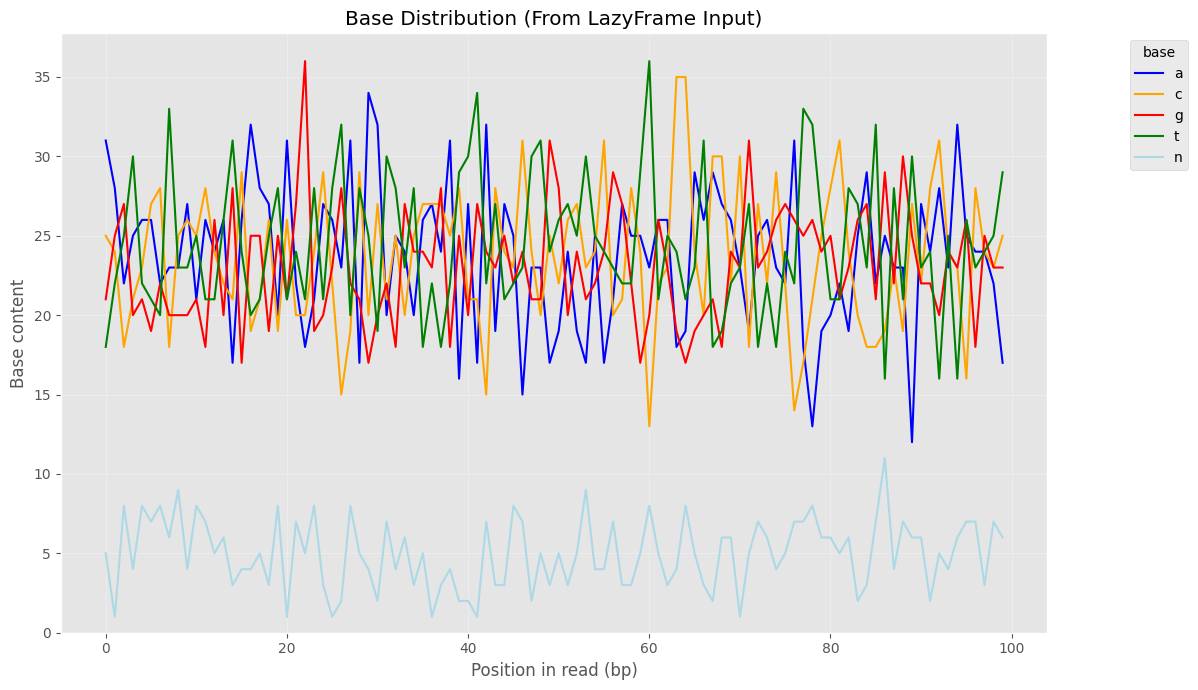

In [7]:
lazy_sequences = df_sequences.lazy()
print(f"Type of input: {type(lazy_sequences)}")

result_lazy = base_sequence_content(lazy_sequences)
print("Result from LazyFrame input:")
print(result_lazy.head())

plot_base_content(
    result_lazy,
    figsize=(12, 7),
    title='Base Distribution (From LazyFrame Input)'
)

5.3 Testing with Pandas DataFrame Input

Type of input: <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Result from pandas DataFrame input:
shape: (5, 5)
┌─────────┬─────────┬─────────┬─────────┬─────────┐
│ a_count ┆ c_count ┆ g_count ┆ t_count ┆ n_count │
│ ---     ┆ ---     ┆ ---     ┆ ---     ┆ ---     │
│ u64     ┆ u64     ┆ u64     ┆ u64     ┆ u64     │
╞═════════╪═════════╪═════════╪═════════╪═════════╡
│ 31      ┆ 25      ┆ 21      ┆ 18      ┆ 5       │
│ 28      ┆ 24      ┆ 25      ┆ 22      ┆ 1       │
│ 22      ┆ 18      ┆ 27      ┆ 25      ┆ 8       │
│ 25      ┆ 21      ┆ 20      ┆ 30      ┆ 4       │
│ 26      ┆ 23      ┆ 21      ┆ 22      ┆ 8       │
└─────────┴─────────┴─────────┴─────────┴─────────┘


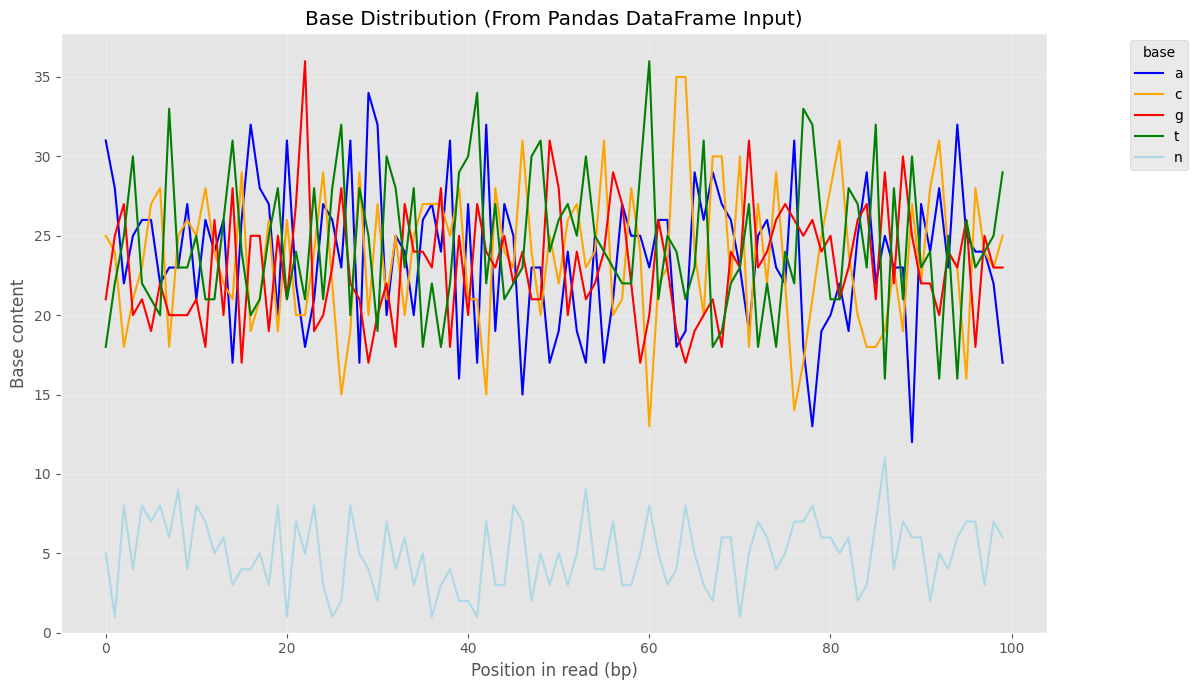

In [8]:
import pandas as pd
pandas_sequences = df_sequences.to_pandas()
print(f"Type of input: {type(pandas_sequences)}")

result_pandas = base_sequence_content(pandas_sequences)
print("Result from pandas DataFrame input:")
print(result_pandas.head())

plot_base_content(
    result_pandas,
    figsize=(12, 7),
    title='Base Distribution (From Pandas DataFrame Input)'
)

5.4 Testing with Parquet file Input

<class 'str'>
Result from Parquet file input:
shape: (5, 5)
┌─────────┬─────────┬─────────┬─────────┬─────────┐
│ a_count ┆ c_count ┆ g_count ┆ t_count ┆ n_count │
│ ---     ┆ ---     ┆ ---     ┆ ---     ┆ ---     │
│ u64     ┆ u64     ┆ u64     ┆ u64     ┆ u64     │
╞═════════╪═════════╪═════════╪═════════╪═════════╡
│ 31      ┆ 25      ┆ 21      ┆ 18      ┆ 5       │
│ 28      ┆ 24      ┆ 25      ┆ 22      ┆ 1       │
│ 22      ┆ 18      ┆ 27      ┆ 25      ┆ 8       │
│ 25      ┆ 21      ┆ 20      ┆ 30      ┆ 4       │
│ 26      ┆ 23      ┆ 21      ┆ 22      ┆ 8       │
└─────────┴─────────┴─────────┴─────────┴─────────┘


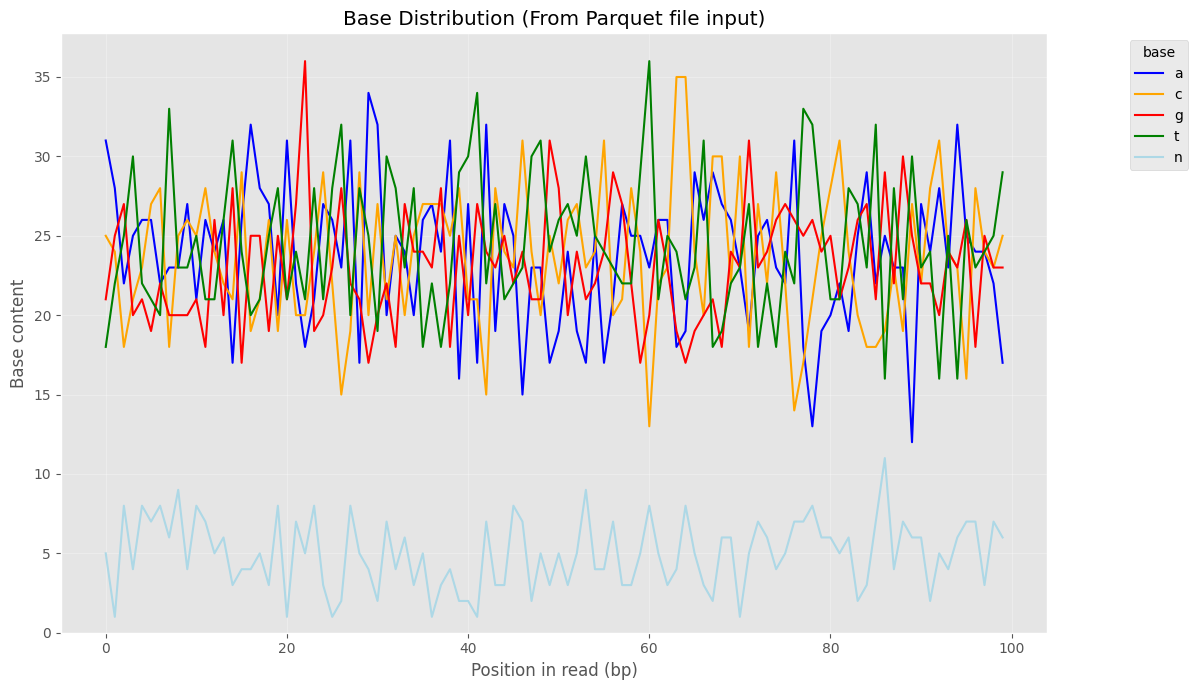

In [7]:
parquet_file_path = "tmp.parquet"
df_sequences.write_parquet(parquet_file_path)

result_parquet = base_sequence_content(parquet_file_path)
print("Result from Parquet file input:")
print(result_parquet.head())

plot_base_content(
    result_parquet,
    figsize=(12, 7),
    title="Base Distribution (From Parquet file input)"
)

# 6. Clean up tmp files

Clean up temporary files created during the analysis

In [ ]:
cleanTMP()